# Machine Learning and Statistics Assignment 

## Autumn/Winter 2021

---
Part 1 - scikit-learn
---

<br>

![scikit_logo](./Images/scikit-learn-logo.png)

<br>

## 1. Overview of the scikit-learn Python library  
[scikit-learn homepage](https://scikit-learn.org/stable/)

>"Scikit-learn is a machine learning library for Python. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy." https://en.wikipedia.org/wiki/Scikit-learn

Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities.
___

>In general, a learning problem considers a set of n samples of data and then tries to predict properties of unknown data. If each sample is more than a single number and, for instance, a multi-dimensional entry (aka multivariate data), it is said to have several attributes or features.

>Learning problems fall into a few categories:

>1. supervised learning, in which the data comes with additional attributes that we want to predict (Click here to go to the scikit-learn supervised learning page).This problem can be either:

> - classification: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. An example of a classification problem would be handwritten digit recognition, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class.

> - regression: if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

> 2. unsupervised learning, in which the training data consists of a set of input vectors x without any corresponding target values. The goal in such problems may be to discover groups of similar examples within the data, where it is called clustering, or to determine the distribution of data within the input space, known as density estimation, or to project the data from a high-dimensional space down to two or three dimensions for the purpose of visualization (Click here to go to the Scikit-Learn unsupervised learning page).

>Training set and testing set

>Machine learning is about learning some properties of a data set and then testing those properties against another data set. A common practice in machine learning is to evaluate an algorithm by splitting a data set into two. We call one of those sets the training set, on which we learn some properties; we call the other set the testing set, on which we test the learned properties.

https://scikit-learn.org/stable/tutorial/basic/tutorial.html#machine-learning-the-problem-setting

<br>

- Classification - Identifying which category an object belongs to
- Regression - Predicting a continuous-valued attribute associated with an object
- Clustering - Automatic grouping of similar objects into sets
- Dimensionality reduction - Reducing the number of random variables to consider
- Model selection - Comparing, validating and choosing parameters and models
- Preprocessing - Feature extraction and normalization

___

<br>

## The Wine dataset
___

I'm going use the wine dataset to the give an overview of the package and to demonstrate some of the algorithims inherent.

We begin by importing all of the libraries required. 

In [2]:
# Numerical arrays
import numpy as np

# Data frames
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Logistic regression
import sklearn.linear_model as lm

# K nearest neighbours
import sklearn.neighbors as nei

# train_test_split
from sklearn.model_selection import train_test_split

# Helper functions
import sklearn.model_selection as mod

# Fancier, statistical plots
import seaborn as sns

In [23]:
# set global size for all plots
plt.rcParams["figure.figsize"] = (18,12)

# set global style for all plots
plt.style.use('ggplot')

These data are the results of a chemical analysis of wines produced in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 
We import the data as follows using **pandas**.

In [3]:
# Load the wine data set from a URL.
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


The headings weren't included with the raw data so I had to find them elsewhere. I renamed several just for clarity later on.

In [4]:
# had to find the column headers elsewhere
df.columns = ['wine_name','alcohol%','malicAcid','ash','ashalcalinity','magnesium','totalPhenols','flavanoids'
              ,'nonFlavanoidPhenols','proanthocyanins','colorIntensity','hue','od280_od315','proline']
# prints first 10 rows
df.head(10)

,wine_name,alcohol%,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


Just a brief rundown on what each variable is:
- wine_name - there are 3 names just named 1, 2, and 3
- alcohol% - 
- 

Just to get a bit of an overview of the data, first with the **.info()** function and then **.describe()**.

In [7]:
# overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   wine_name            178 non-null    int64  
 1   alcohol%             178 non-null    float64
 2   malicAcid            178 non-null    float64
 3   ash                  178 non-null    float64
 4   ashalcalinity        178 non-null    float64
 5   magnesium            178 non-null    int64  
 6   totalPhenols         178 non-null    float64
 7   flavanoids           178 non-null    float64
 8   nonFlavanoidPhenols  178 non-null    float64
 9   proanthocyanins      178 non-null    float64
 10  colorIntensity       178 non-null    float64
 11  hue                  178 non-null    float64
 12  od280_od315          178 non-null    float64
 13  proline              178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
# data statistics.
df.describe()

,wine_name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


A few things to note:
- there are 178 entries/wines
- there are no null values
- three are of data-types int64 and the rest float64
- the wine_namnes category is int64 - we're going to have to change this straight away!

We change 'wine_name' from **int64** to **category** datatype.  
https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html

>"*The category data type in pandas is a hybrid data type. It looks and behaves like a string in many instances but internally is represented by an array of integers. This allows the data to be sorted in a custom order and to more efficiently store the data.* https://pbpython.com/pandas_dtypes_cat.html

In [11]:
# change the datatype from integer to category
df['wine_name'] = df['wine_name'].astype('int64').astype('category')

Now to check to see how many of each there are.

In [14]:
# how many of each category
df['wine_name'].value_counts()

2    71
1    59
3    48
Name: wine_name, dtype: int64

Just to get an overview of the other variables, we can plot histograms for each. We can see that some of them are normally distributed

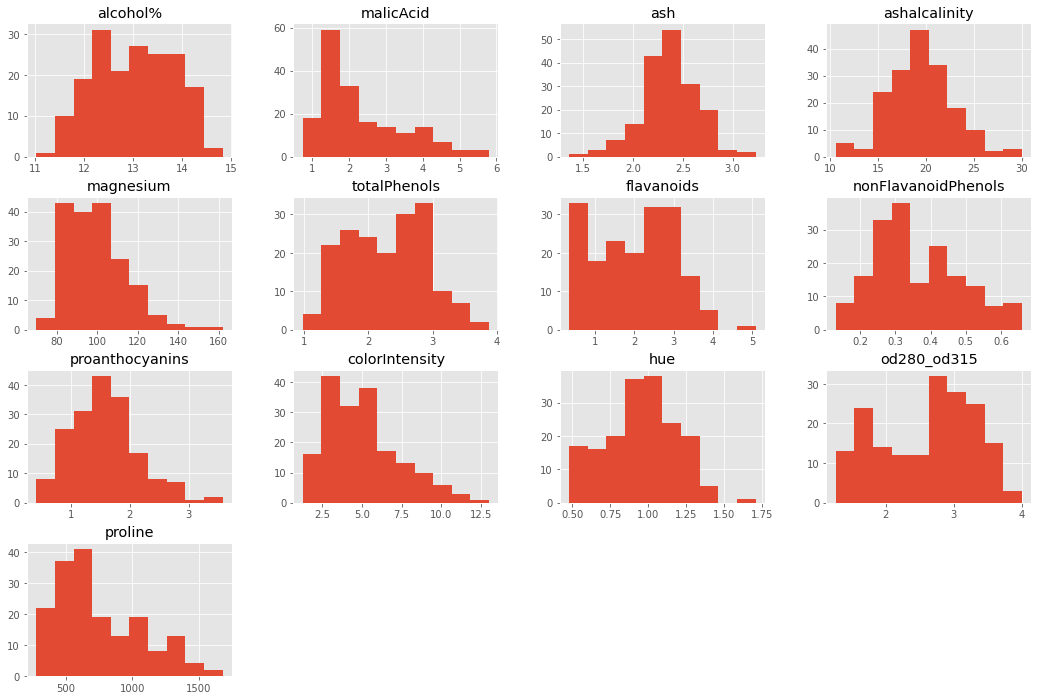

In [24]:
df[['alcohol%','malicAcid', 'ash', 'ashalcalinity', 'magnesium', 'totalPhenols', 'flavanoids', 'nonFlavanoidPhenols', 'proanthocyanins', 'colorIntensity', 'hue', 'od280_od315', 'proline']].hist();

Just to have a look at the **correlation**

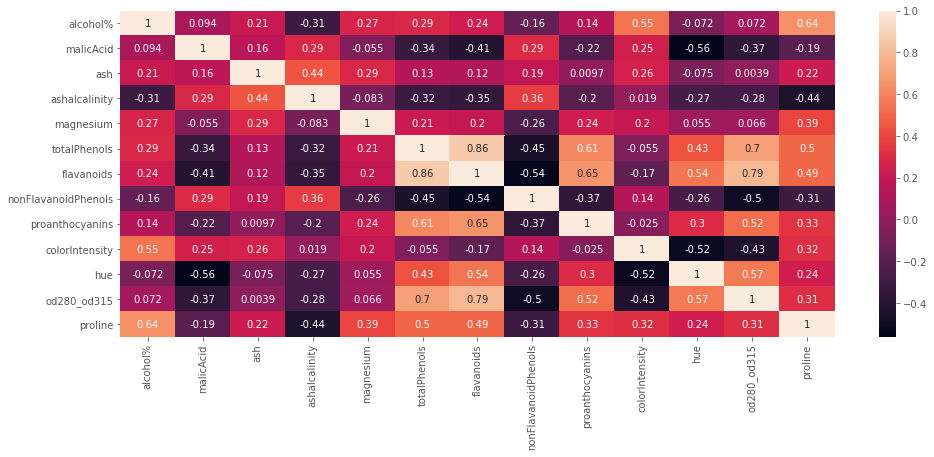

In [25]:
# visualise correlation
corr = df[df.columns].corr()
plt.figure(figsize=(16, 6))
sns.heatmap(corr, annot = True)
plt.show()

We can look at some of the variables and separate out each of the wines. Here we look at alcohol% in a histogram.

<AxesSubplot:xlabel='alcohol%', ylabel='Count'>

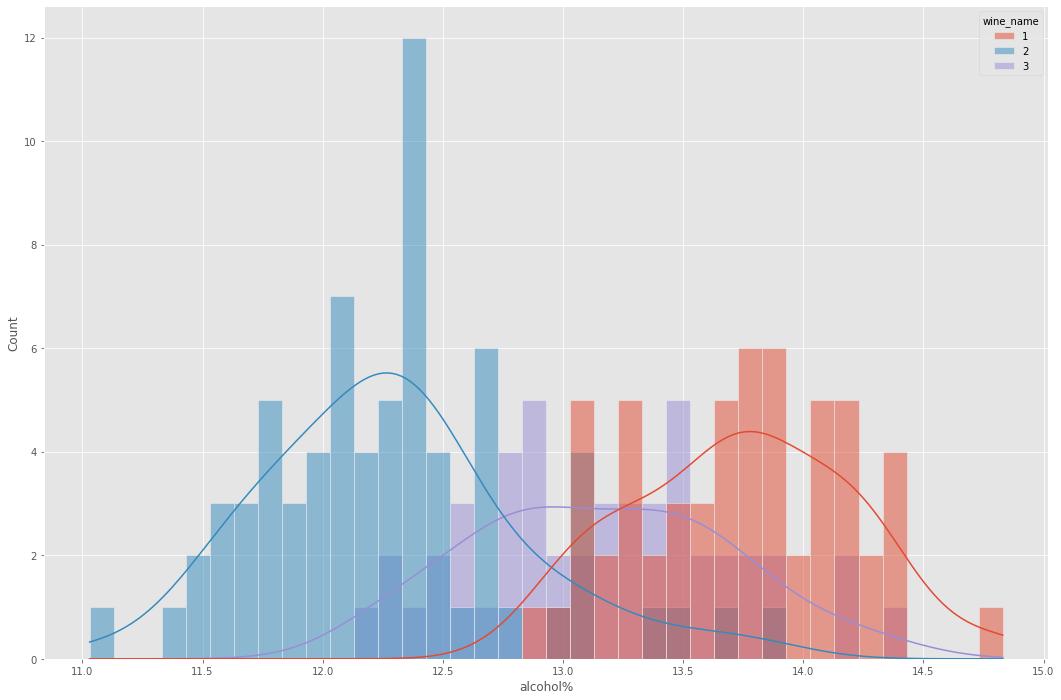

In [27]:
# plotting the alcohol levels and separating the 3 different wines
fig, axs = plt.subplots()

sns.histplot(data=df, x='alcohol%', binwidth=0.1, hue='wine_name', kde=True)

Here we look at 2 variables against each other on a scatterplot.

<AxesSubplot:xlabel='hue', ylabel='colorIntensity'>

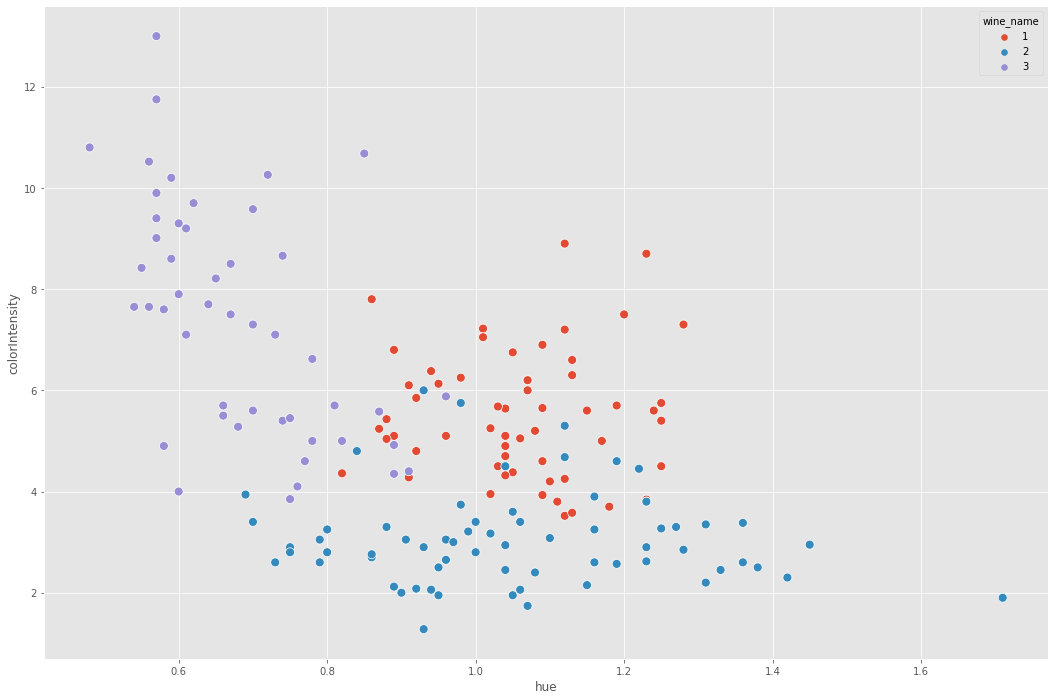

In [36]:
# plotting the malicAcid against the alcohol
sns.scatterplot(data=df, x='hue', y='colorIntensity', hue='wine_name', s=80)

<AxesSubplot:xlabel='flavanoids', ylabel='totalPhenols'>

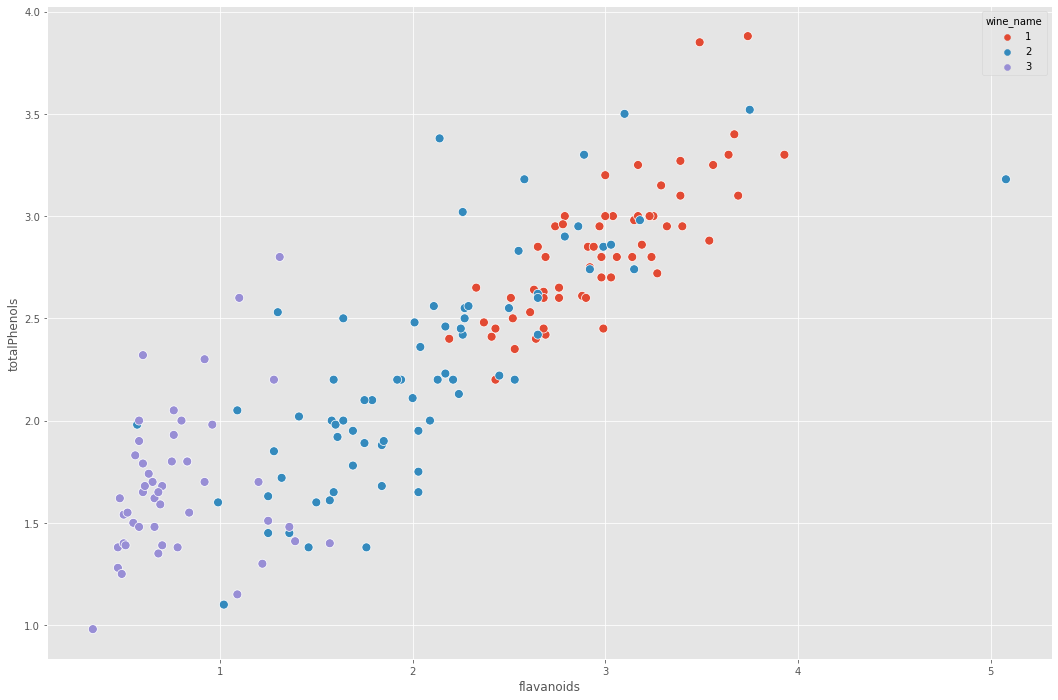

In [41]:
# plotting the malicAcid against the alcohol
sns.scatterplot(data=df, x='flavanoids', y='totalPhenols', hue='wine_name', s=80)

Here's a pairplot comparing all of the attributes against each other. Looks pretty but too much to get any real sense of anything!

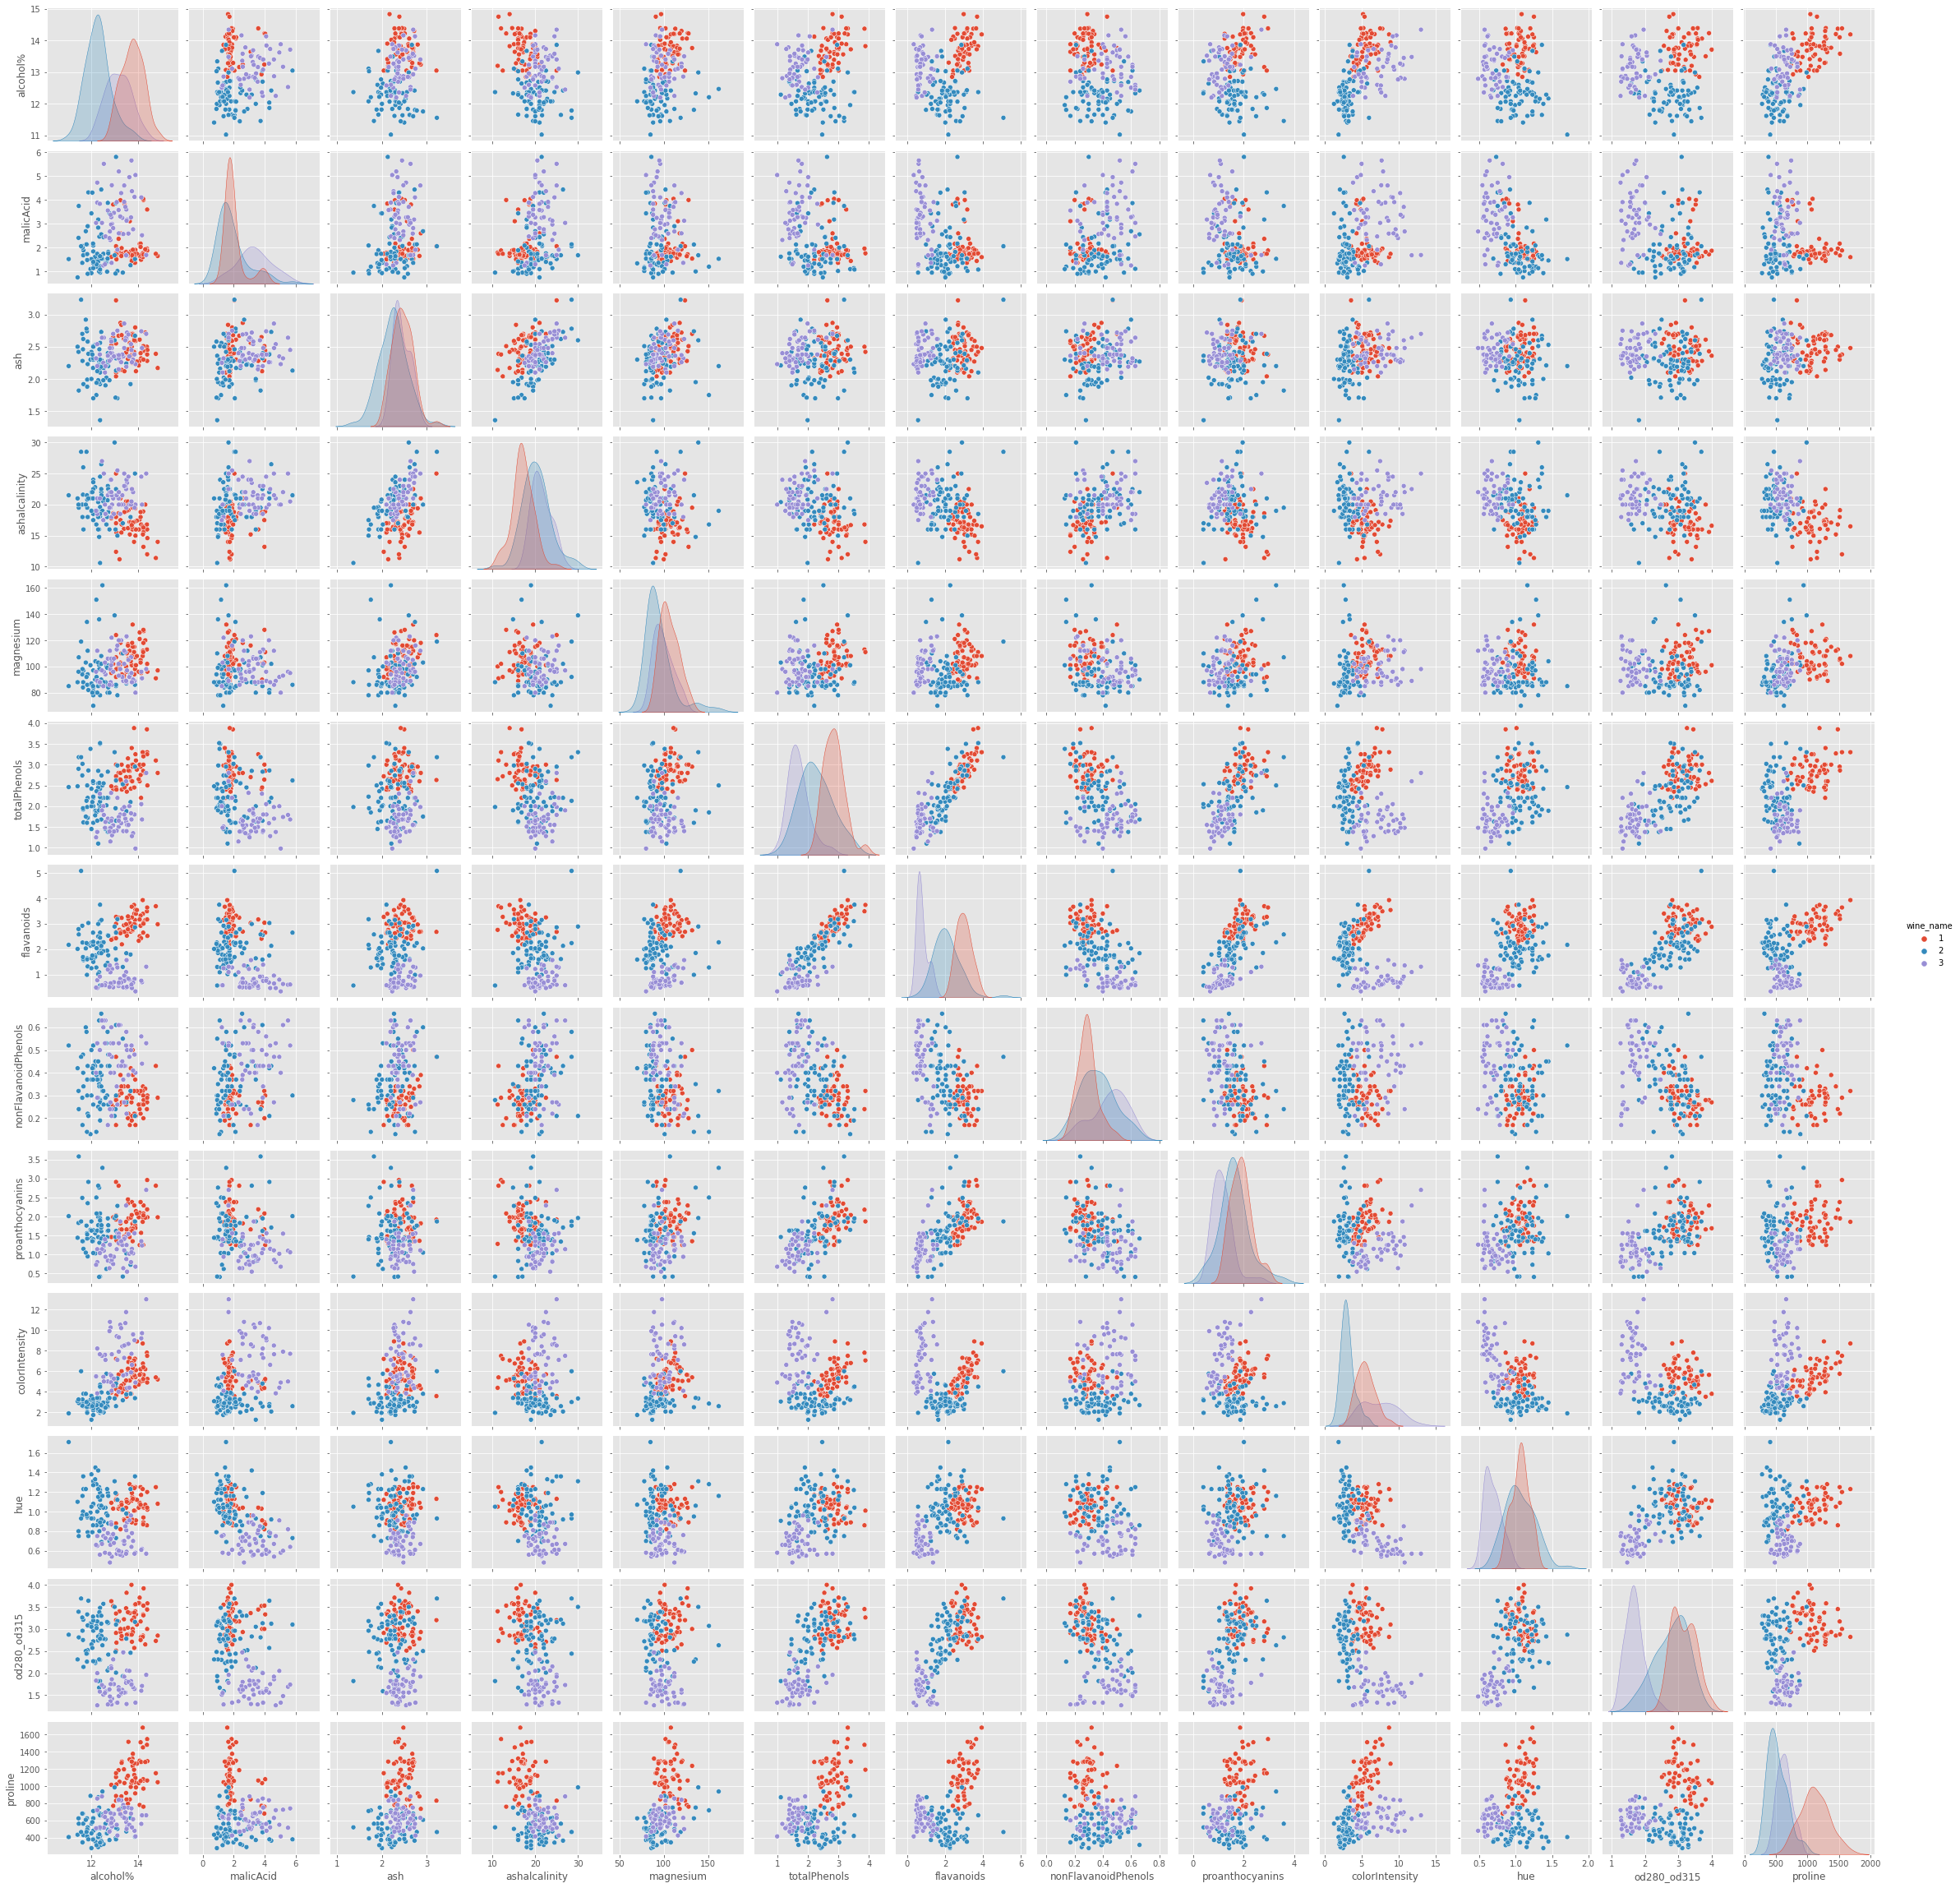

In [39]:
# this pairplot comparing all variables
sns.pairplot(df, hue='wine_name')

After that initial exploration of the data, we move onto some algorithims in **scikit-learn**.

In [140]:
# Segregate the data
wine1 = df[df['wine_name'] == 1]
wine2 = df[df['wine_name'] == 2]
wine3 = df[df['wine_name'] == 3]

In [142]:
wine1

,wine_name,alcohol%,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


<br>

___

## K-Nearest Neighbor

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

___

>"*In statistics, the k-nearest neighbors algorithm (k-NN) is a non-parametric classification method first developed by Evelyn Fix and Joseph Hodges in 1951, and later expanded by Thomas Cover. It is used for classification and regression.*" https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

**K-Nearest Neighbor** is a supervised classification algorithm used to assign a class to new data point. In our case, we are trying to work out, if we had the relevent data points for an unknown wine, could we assign it to one of our three.

https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75

We first create the inputs and the output.

In [82]:
# create inputs
inputs = df[["alcohol%", "malicAcid", "ash", "ashalcalinity", "magnesium", "totalPhenols", 
             "flavanoids", "nonFlavanoidPhenols", "proanthocyanins", "colorIntensity", "hue", 
             "od280_od315", "proline"]]

# create outputs
outputs = df["wine_name"]

In [83]:
# create the classifier
knn = nei.KNeighborsClassifier(n_neighbors=5)

In [84]:
# fit the classifier
knn.fit(inputs, outputs)

KNeighborsClassifier()

In [85]:
# pick an entry to test
df.loc[34]

wine_name                 1.00
alcohol%                 13.51
malicAcid                 1.80
ash                       2.65
ashalcalinity            19.00
magnesium               110.00
totalPhenols              2.35
flavanoids                2.53
nonFlavanoidPhenols       0.29
proanthocyanins           1.54
colorIntensity            4.20
hue                       1.10
od280_od315               2.87
proline                1095.00
Name: 34, dtype: float64

In [86]:
knn.predict([[13.51, 1.80, 2.65, 19.00, 110.00, 2.35, 2.53, 0.29, 1.54, 4.20, 1.10, 2.87, 1095]])

array([1])

Correct!!!

In [87]:
# another test using the 'test' sample
knn.score(test[["alcohol%", "malicAcid", "ash", "ashalcalinity", "magnesium", "totalPhenols", 
             "flavanoids", "nonFlavanoidPhenols", "proanthocyanins", "colorIntensity", "hue", 
             "od280_od315", "proline"]], test['wine_name'])

0.7555555555555555

That's not great!

### Evaluate

In [88]:
# this sees how well it's working
# Counts the amount of Trues (1) and adds them up
(knn.predict(inputs) == outputs).sum()

140

Again not brilliant I suppose!

I'm going to split the dataset and try train and test

Documentation - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [89]:
# splitting the data. I could specify the split but I'm just going for default here which gives me 133/178 which is roughly 3/4
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs)

In [90]:
inputs_test.count()

alcohol%               45
malicAcid              45
ash                    45
ashalcalinity          45
magnesium              45
totalPhenols           45
flavanoids             45
nonFlavanoidPhenols    45
proanthocyanins        45
colorIntensity         45
hue                    45
od280_od315            45
proline                45
dtype: int64

In [97]:
# prints the first 6 rows from the training set 
test.head(6)

,wine_name,alcohol%,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
45,1,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080
104,2,12.51,1.73,1.98,20.5,85,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672
168,3,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750
60,2,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680
85,2,12.67,0.98,2.24,18.0,99,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560


In [98]:
knn = nei.KNeighborsClassifier(n_neighbors=5)
knn.fit(inputs_train, outputs_train)

KNeighborsClassifier()

In [99]:
knn.predict(inputs_test)

array([3, 1, 2, 3, 2, 3, 2, 1, 3, 3, 1, 1, 1, 1, 2, 1, 1, 3, 3, 3, 2, 2,
       1, 2, 3, 2, 2, 2, 1, 2, 2, 1, 1, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 2,
       2])

In [100]:
(knn.predict(inputs_test) == outputs_test).sum()

33

Again not brilliant! :)<br>
This will change every time the program is run though


<br>

___

## Logistic Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

---

In [114]:
inputs, outputs = train[['alcohol%', 'colorIntensity']], train['wine_name']

In [117]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=42)

# Train the classifier on our data.
lre.fit(inputs, outputs)

LogisticRegression(random_state=42)

In [118]:
# Ask the classifier to classify the test data.
predictions = lre.predict(test[['alcohol%', 'colorIntensity']])
predictions

array([1, 2, 3, 2, 2, 1, 2, 2, 2, 3, 2, 3, 1, 3, 1, 3, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 1, 2, 3, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 3, 1, 3, 2, 2,
       2])

In [119]:
# Eyeball the misclassifications.
predictions == test['wine_name']

45      True
104     True
168     True
60      True
85      True
177    False
77      True
96      True
130    False
139     True
87      True
156     True
146    False
131     True
13      True
171     True
57      True
125     True
4       True
29      True
115     True
36      True
83     False
120     True
107     True
32      True
74      True
174     True
54      True
38     False
55      True
165    False
93      True
7       True
99      True
92      True
118     True
1       True
42      True
166     True
71     False
163     True
110     True
84      True
80      True
Name: wine_name, dtype: bool

In [120]:
# What proportion were correct?
lre.score(test[['alcohol%', 'colorIntensity']], test['wine_name'])

0.8444444444444444

In [121]:
# Append a column to the test data frame with the predictions.
test['predicted'] = predictions
test.head()

<ipython-input-121-7f2fd5111565>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted'] = predictions


,wine_name,alcohol%,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline,predicted
45,1,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080,1
104,2,12.51,1.73,1.98,20.5,85,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672,2
168,3,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750,3
60,2,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680,2
85,2,12.67,0.98,2.24,18.0,99,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450,2


In [122]:
# Show the misclassified data.
misclass = test[test['predicted'] != test['wine_name']]
misclass

,wine_name,alcohol%,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline,predicted
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560,1
130,3,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630,2
146,3,13.88,5.04,2.23,20.0,80,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415,1
83,2,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.80,0.84,2.01,515,1
38,1,13.07,1.50,2.10,15.5,98,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020,2
165,3,13.73,4.36,2.26,22.5,88,1.28,0.47,0.52,1.15,6.62,0.78,1.75,520,1
71,2,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410,1


In [123]:
# Eyeball the descriptive statistics for the species
train.groupby('wine_name').mean()

,alcohol%,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
wine_name,,,,,,,,,,,,,
1,13.760000,2.009348,2.455217,17.221739,106.260870,2.862826,3.018478,0.287609,1.946522,5.682826,1.065217,3.169130,1131.456522
2,12.303922,1.881176,2.232549,20.278431,95.078431,2.260000,2.115882,0.362549,1.607451,3.149412,1.051294,2.780196,524.784314
3,13.085000,3.307500,2.434444,21.416667,99.361111,1.708611,0.786667,0.455833,1.168333,7.473611,0.675000,1.703611,643.611111


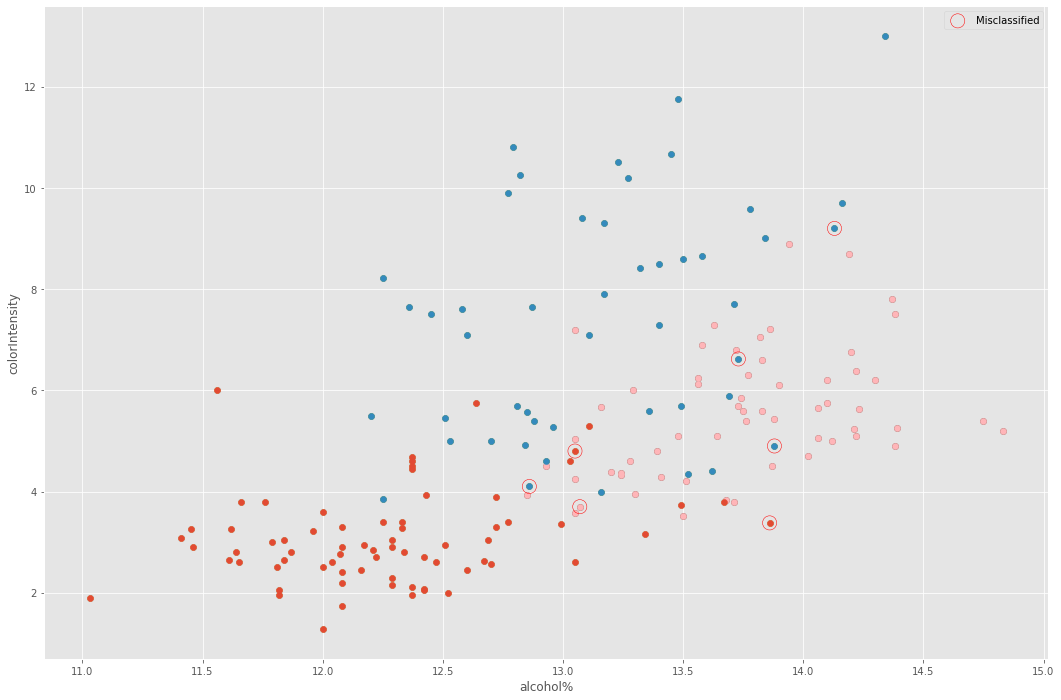

In [146]:
# New plot.
fig, ax = plt.subplots()

# Plot the training data
for species, data in df.groupby('wine_name'):
    ax.scatter(wine1['alcohol%'], wine1['colorIntensity'])
    ax.scatter(wine2['alcohol%'], wine2['colorIntensity'])
    ax.scatter(wine3['alcohol%'], wine3['colorIntensity'])

# Plot misclassified.
ax.scatter(misclass['alcohol%'], misclass['colorIntensity'], s=200, facecolor='none', edgecolor='r', label='Misclassified')

ax.set_xlabel('alcohol%')
ax.set_ylabel('colorIntensity')
ax.legend();

---
**need to go back over this stuff as it doesn't seem to be working!**

In [34]:
# from sklearn import datasets

# from sklearn.svm import SVC
# df = datasets.load_wine()
# clf = SVC()
# clf.fit(df.data, df.target)

In [35]:
# list(clf.predict(df.data[:3]))


In [36]:
# clf.fit(df.data, df.target_names[df.target])

In [37]:
# list(clf.predict(df.data[:3]))

**Not quite sure what's happening here!**

In [29]:
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True)

In [30]:
clf = SVC()
clf.set_params(kernel='linear').fit(X, y)

SVC(kernel='linear')

In [31]:
clf.predict(X[:5])

array([0, 0, 0, 0, 0])

In [32]:
clf.set_params(kernel='rbf').fit(X, y)

SVC()

In [33]:
clf.predict(X[:5])

array([0, 0, 0, 0, 2])

___
**Again need to revise what's going on here**

The following is from https://docs.w3cub.com/scikit_learn/auto_examples/preprocessing/plot_scaling_importance#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py

In [ ]:
# from __future__ import print_function
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.naive_bayes import GaussianNB
# from sklearn import metrics
# import matplotlib.pyplot as plt
# from sklearn.datasets import load_wine
# from sklearn.pipeline import make_pipeline
# print(__doc__)

# # Code source: Tyler Lanigan <tylerlanigan@gmail.com>
# #              Sebastian Raschka <mail@sebastianraschka.com>

# # License: BSD 3 clause

# RANDOM_STATE = 42
# FIG_SIZE = (10, 7)


# features, target = load_wine(return_X_y=True)

# # Make a train/test split using 30% test size
# X_train, X_test, y_train, y_test = train_test_split(features, target,
#                                                     test_size=0.30,
#                                                     random_state=RANDOM_STATE)

# # Fit to data and predict using pipelined GNB and PCA.
# unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
# unscaled_clf.fit(X_train, y_train)
# pred_test = unscaled_clf.predict(X_test)

# # Fit to data and predict using pipelined scaling, GNB and PCA.
# std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
# std_clf.fit(X_train, y_train)
# pred_test_std = std_clf.predict(X_test)

# # Show prediction accuracies in scaled and unscaled data.
# print('\nPrediction accuracy for the normal test dataset with PCA')
# print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))

# print('\nPrediction accuracy for the standardized test dataset with PCA')
# print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))

# # Extract PCA from pipeline
# pca = unscaled_clf.named_steps['pca']
# pca_std = std_clf.named_steps['pca']

# # Show first principal components
# print('\nPC 1 without scaling:\n', pca.components_[0])
# print('\nPC 1 with scaling:\n', pca_std.components_[0])

# # Scale and use PCA on X_train data for visualization.
# scaler = std_clf.named_steps['standardscaler']
# X_train_std = pca_std.transform(scaler.transform(X_train))

# # visualize standardized vs. untouched dataset with PCA performed
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)


# for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
#     ax1.scatter(X_train[y_train == l, 0], X_train[y_train == l, 1],
#                 color=c,
#                 label='class %s' % l,
#                 alpha=0.5,
#                 marker=m
#                 )

# for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
#     ax2.scatter(X_train_std[y_train == l, 0], X_train_std[y_train == l, 1],
#                 color=c,
#                 label='class %s' % l,
#                 alpha=0.5,
#                 marker=m
#                 )

# ax1.set_title('Training dataset after PCA')
# ax2.set_title('Standardized training dataset after PCA')

# for ax in (ax1, ax2):
#     ax.set_xlabel('1st principal component')
#     ax.set_ylabel('2nd principal component')
#     ax.legend(loc='upper right')
#     ax.grid()

# plt.tight_layout()

# plt.show()

# END